In [24]:
import h2o
import pandas as pd

In [25]:
X = pd.read_csv('X.csv')
y = pd.read_csv('y.csv').iloc[:,2]

/var/folders/ws/cyn_cs8n1jv667c3gxdkkfqc0000gn/T/ipykernel_4942/3546882471.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  X = pd.read_csv('X.csv')


In [26]:
X

,SEN,waterflow,airflow,position,time,AN_1_LL[m/s],AN_2_LQ[m/s],AN_3_RQ[m/s],AN_4_RR[m/s],MM_LL[mm],MM_LQ[mm],MM_RQ[mm],MM_RR[mm],L_wave_ht[mm],R_wave_ht[mm]
0,SEN10,1.8,6.0,0-1,24.7,0.2880,0.2880,0.1888,0.1888,6.05,-3.95,-2.95,4.20,10.00,7.15
1,SEN10,1.8,6.0,0-1,24.8,0.2880,0.2880,0.1392,0.1888,4.85,-3.85,-1.70,1.50,8.70,3.20
2,SEN10,1.8,6.0,0-1,24.9,0.2880,0.2880,0.1888,0.1888,5.95,-4.50,-2.95,0.90,10.45,3.85
3,SEN10,1.8,6.0,0-1,25.0,0.2384,0.1888,0.1392,0.2384,4.00,-6.65,-3.20,1.90,10.65,5.10
4,SEN10,1.8,6.0,0-1,25.1,0.2880,0.1888,0.1392,0.2384,3.65,-5.90,-1.55,2.10,9.55,3.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99184,SEN06,1.2,6.0,3-4,66.8,0.2384,0.1888,0.1392,0.1888,-4.85,-3.45,-5.15,-0.55,-1.40,4.60
99185,SEN06,1.2,6.0,3-4,66.9,0.2384,0.1888,0.0896,0.1888,-5.90,-6.20,-6.45,-2.90,0.30,3.55
99186,SEN06,1.2,6.0,3-4,67.0,0.2384,0.1888,0.0896,0.1888,-6.10,-4.60,-5.05,-2.75,-1.50,2.30
99187,SEN06,1.2,6.0,3-4,67.1,0.2384,0.1392,0.1392,0.1392,-6.90,-7.10,-7.00,-0.50,0.20,6.50


In [27]:
data = pd.concat([X, y], axis=1)

In [28]:
y = 'Count_EX1'
X = [name for name in data.columns if name != y]

In [29]:
data.dropna(inplace=True)

In [30]:
from sklearn.model_selection import train_test_split

train, test, _, _ = train_test_split(data, data, test_size=0.2, random_state=42)

In [31]:
h2o.init()

train_h2o = h2o.H2OFrame(train)
test_h2o = h2o.H2OFrame(test)

train_h2o[y] = train_h2o[y].asnumeric()
test_h2o[y] = test_h2o[y].asnumeric()


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,31 mins 30 secs
H2O_cluster_timezone:,America/Toronto
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.4
H2O_cluster_version_age:,1 month and 18 days
H2O_cluster_name:,H2O_from_python_alex_3k7h20
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.151 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [32]:
from h2o.automl import H2OAutoML

aml = H2OAutoML(max_models=20, seed=1, verbosity='info')
aml.train(x=X, y=y, training_frame=train_h2o)

AutoML progress: |
12:30:49.104: Project: AutoML_3_20240828_123049
12:30:49.104: 5-fold cross-validation will be used.
12:30:49.105: Setting stopping tolerance adaptively based on the training frame: 0.0035619005102419284
12:30:49.106: Build control seed: 1
12:30:49.106: training frame: Frame key: AutoML_3_20240828_123049_training_py_11_sid_9040    cols: 16    rows: 78820  chunks: 4    size: 6012340  checksum: -8537923875685711372
12:30:49.106: validation frame: NULL
12:30:49.106: leaderboard frame: NULL
12:30:49.106: blending frame: NULL
12:30:49.106: response column: Count_EX1
12:30:49.106: fold column: null
12:30:49.106: weights column: null
12:30:49.106: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 10w)]

key,value
Stacking strategy,cross_validation
Number of base models (used / total),7/20
# GBM base models (used / total),1/7
# XGBoost base models (used / total),4/6
# DRF base models (used / total),1/2
# DeepLearning base models (used / total),1/4
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [33]:
aml.leaderboard

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_3_20240828_123049,20.6311,425.643,12.3805,0.404635,425.643
StackedEnsemble_BestOfFamily_1_AutoML_3_20240828_123049,20.6376,425.911,12.3853,0.404385,425.911
GBM_4_AutoML_3_20240828_123049,21.06,443.522,12.7914,nan,443.522
DRF_1_AutoML_3_20240828_123049,21.178,448.507,12.7488,0.41445,448.507
XGBoost_grid_1_AutoML_3_20240828_123049_model_2,21.4619,460.613,12.8818,nan,460.613
GBM_3_AutoML_3_20240828_123049,21.647,468.594,13.2389,nan,468.594
GBM_1_AutoML_3_20240828_123049,21.7117,471.4,13.0808,0.426108,471.4
XGBoost_grid_1_AutoML_3_20240828_123049_model_3,22.0535,486.357,13.5126,nan,486.357
GBM_2_AutoML_3_20240828_123049,22.113,488.983,13.6546,nan,488.983
XRT_1_AutoML_3_20240828_123049,22.1561,490.894,13.5825,0.441063,490.894


In [35]:
gbm = h2o.get_model('GBM_4_AutoML_3_20240828_123049')

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

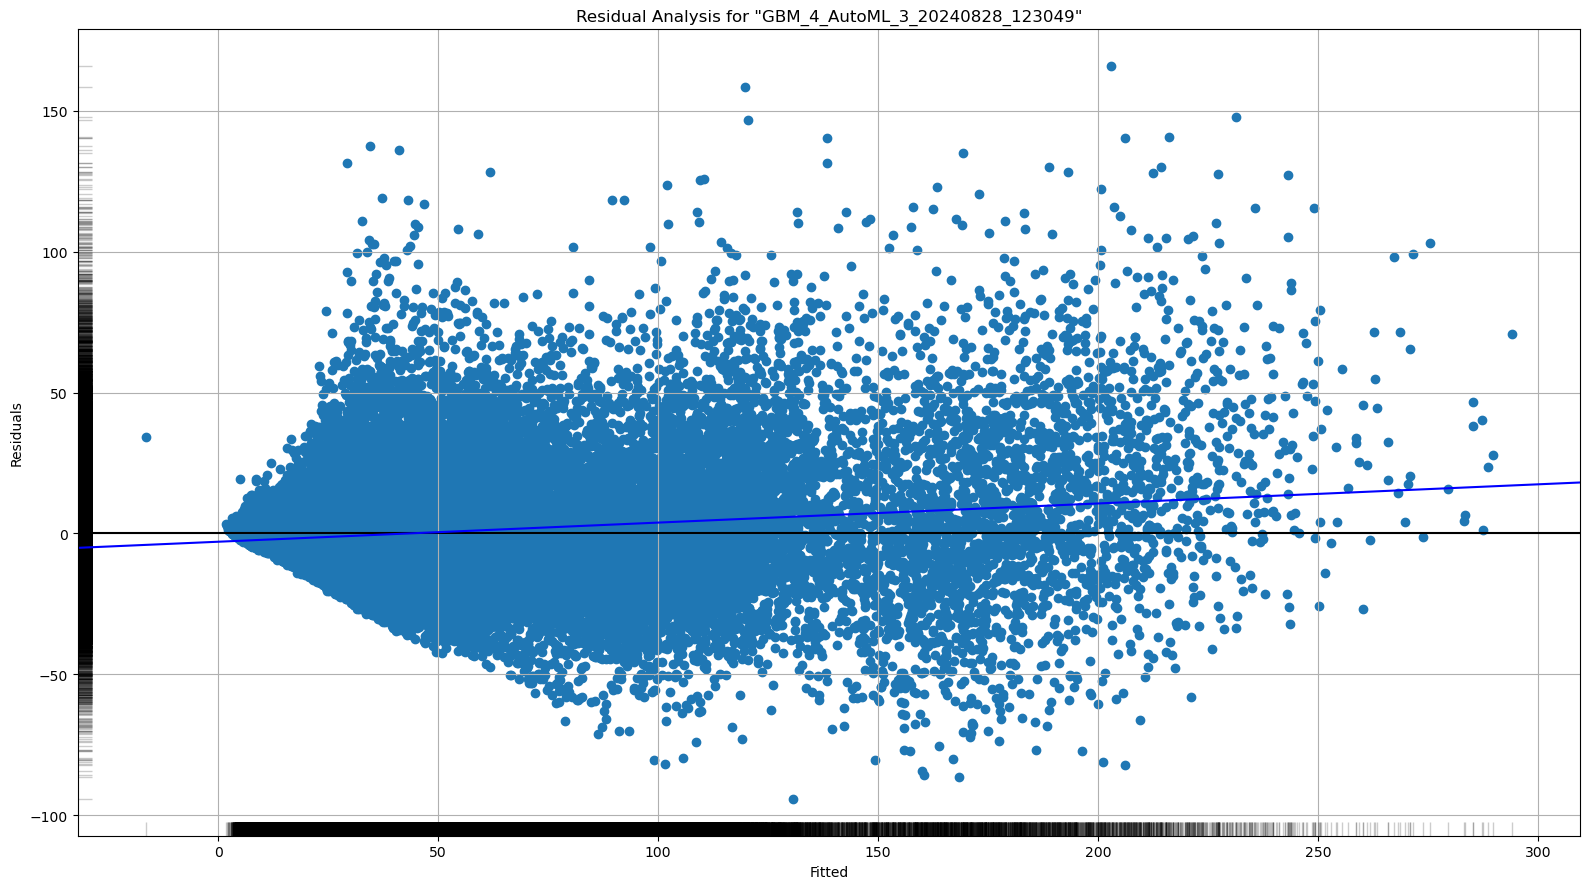

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

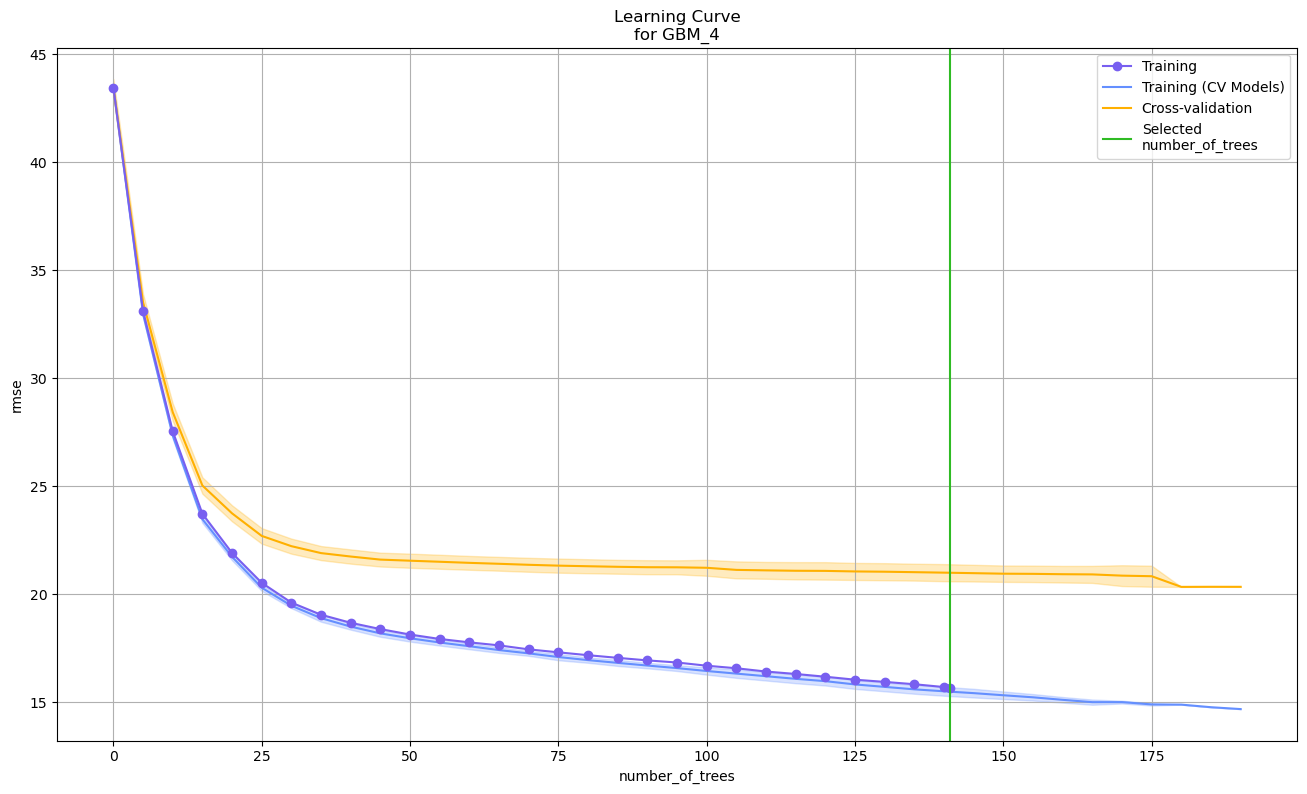

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

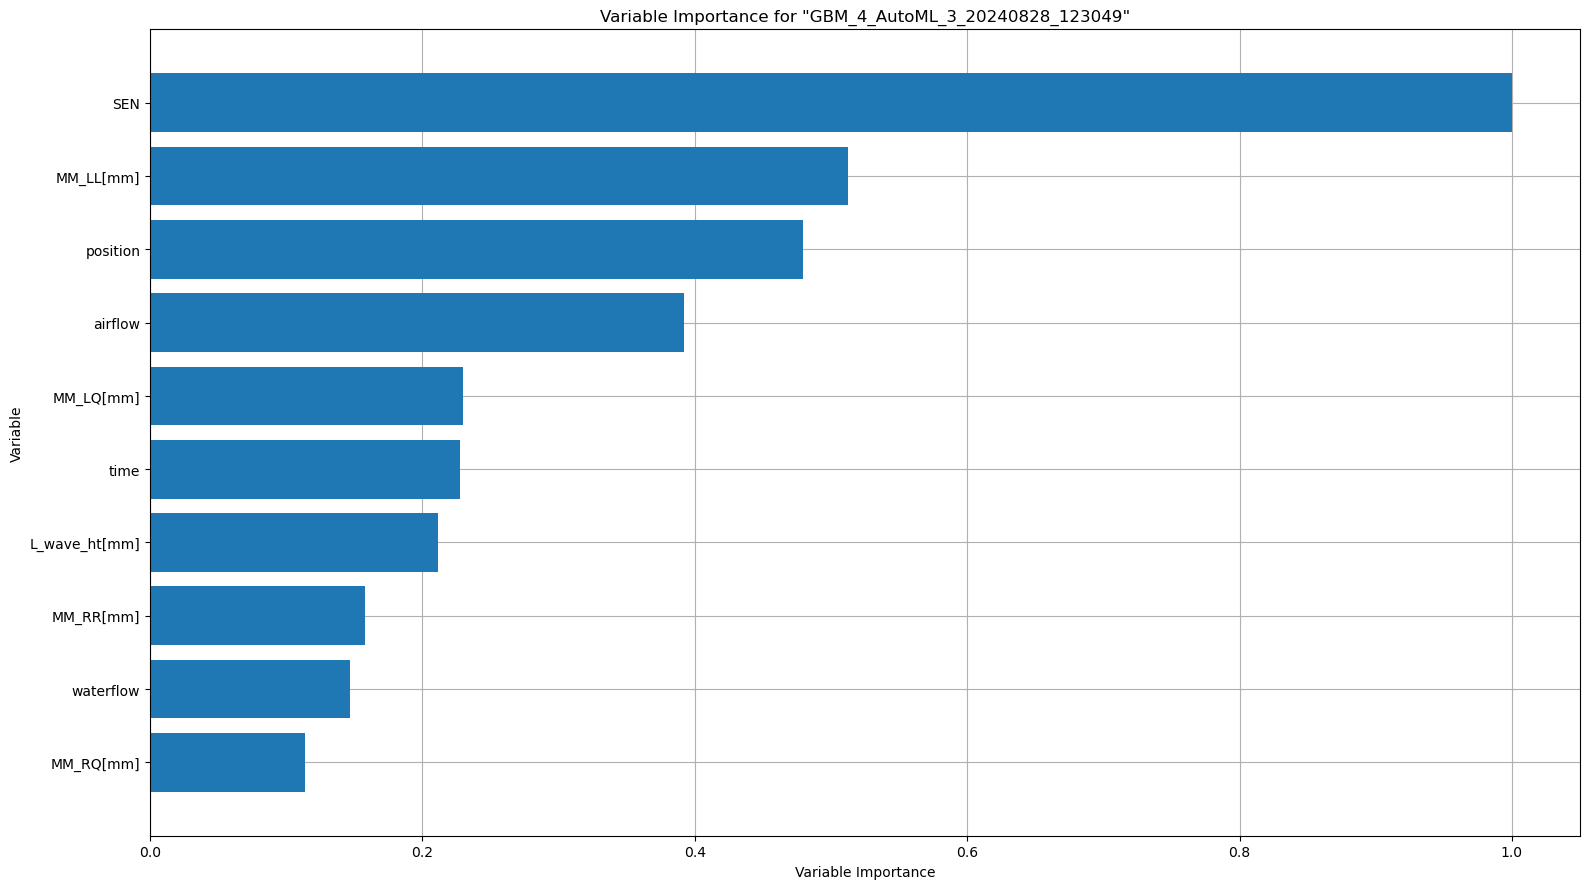

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

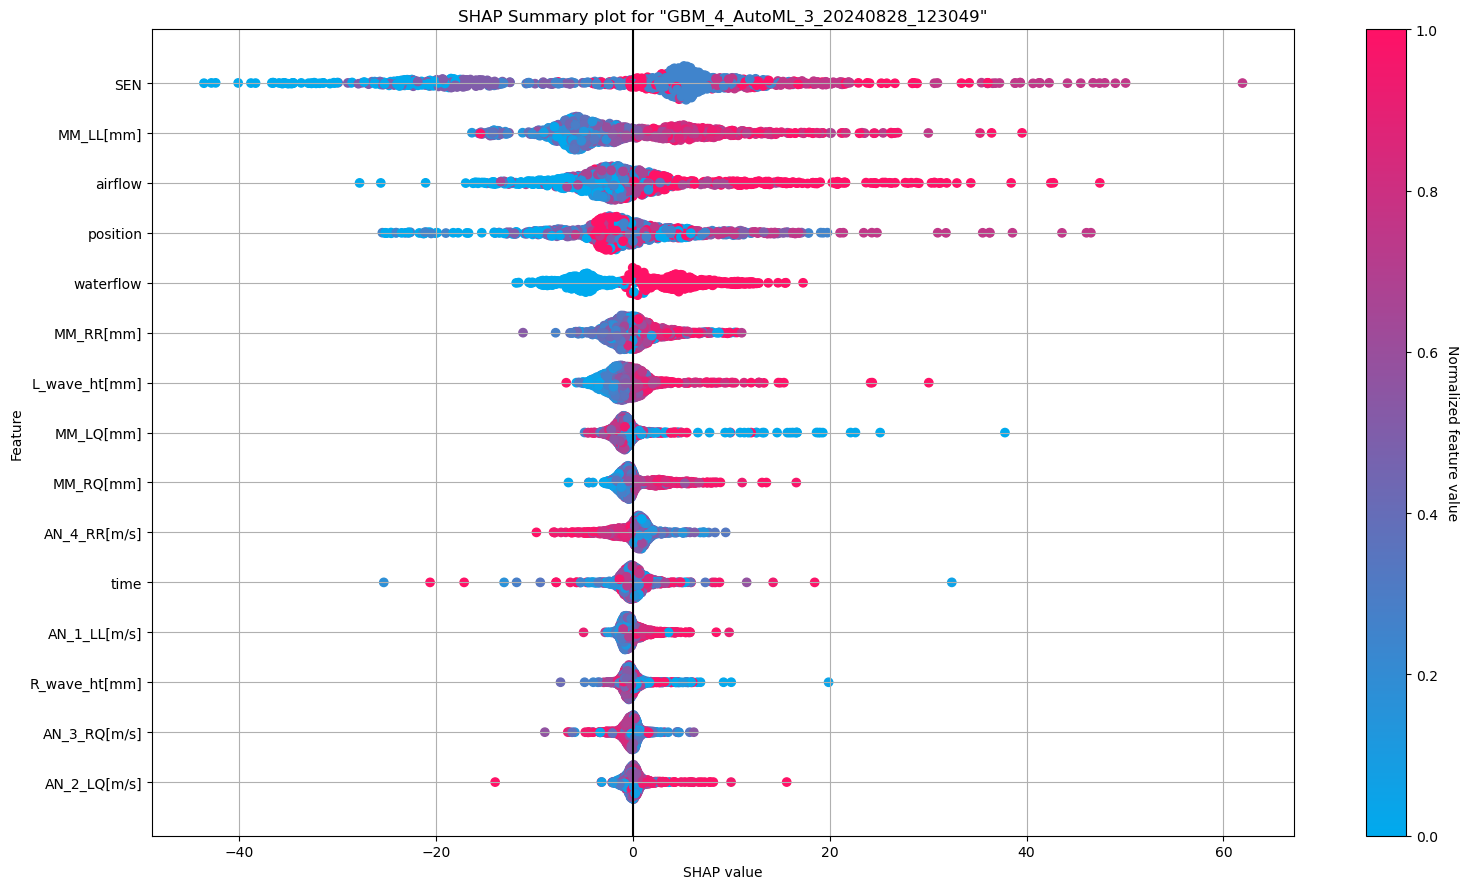

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

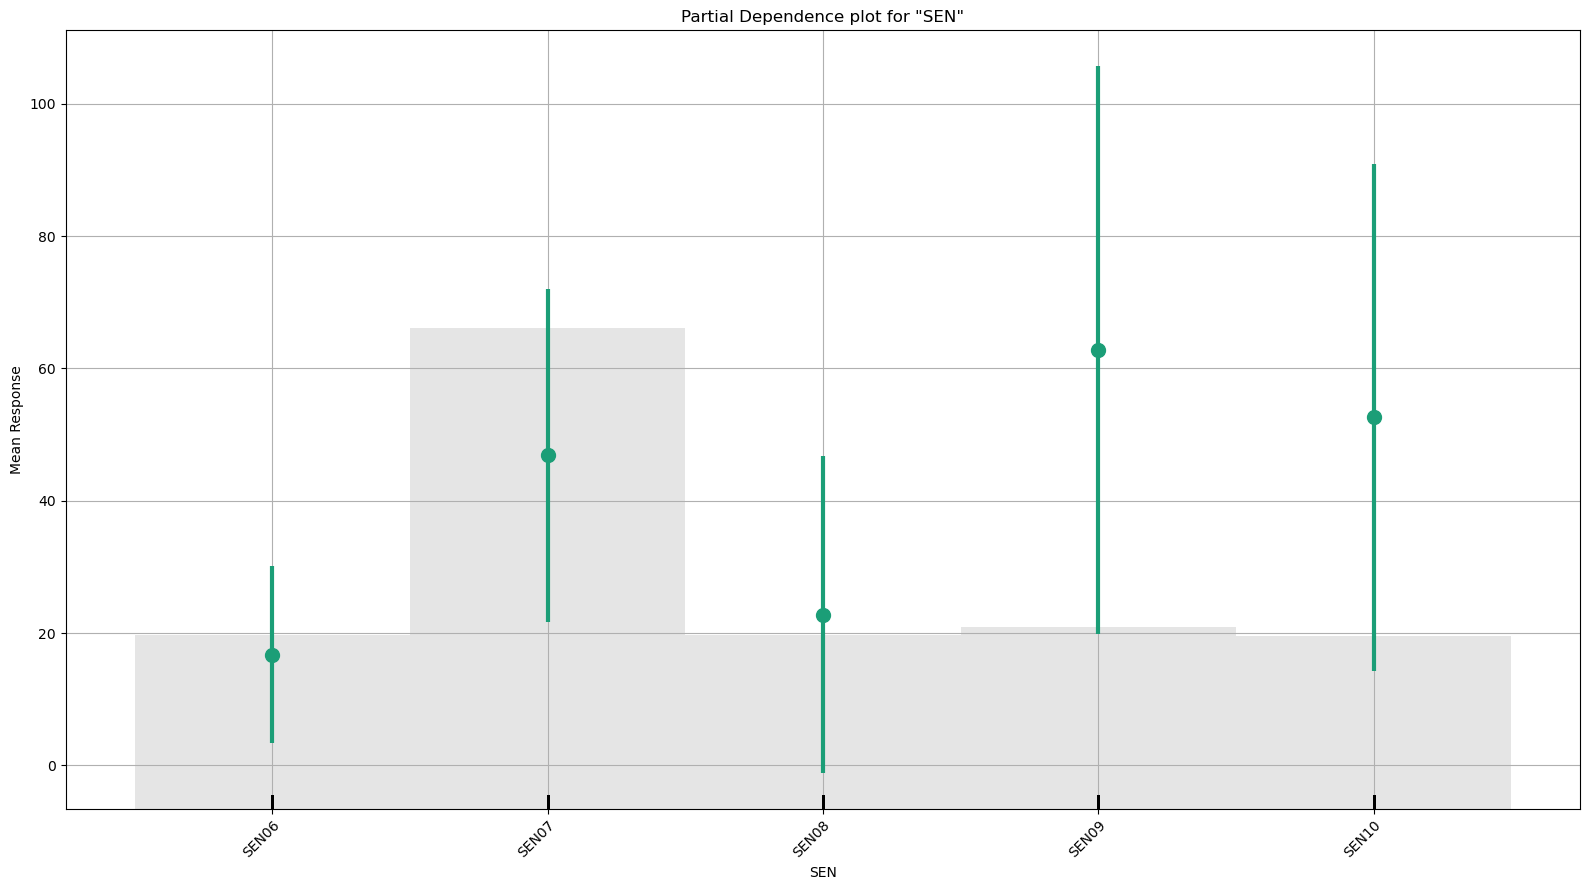

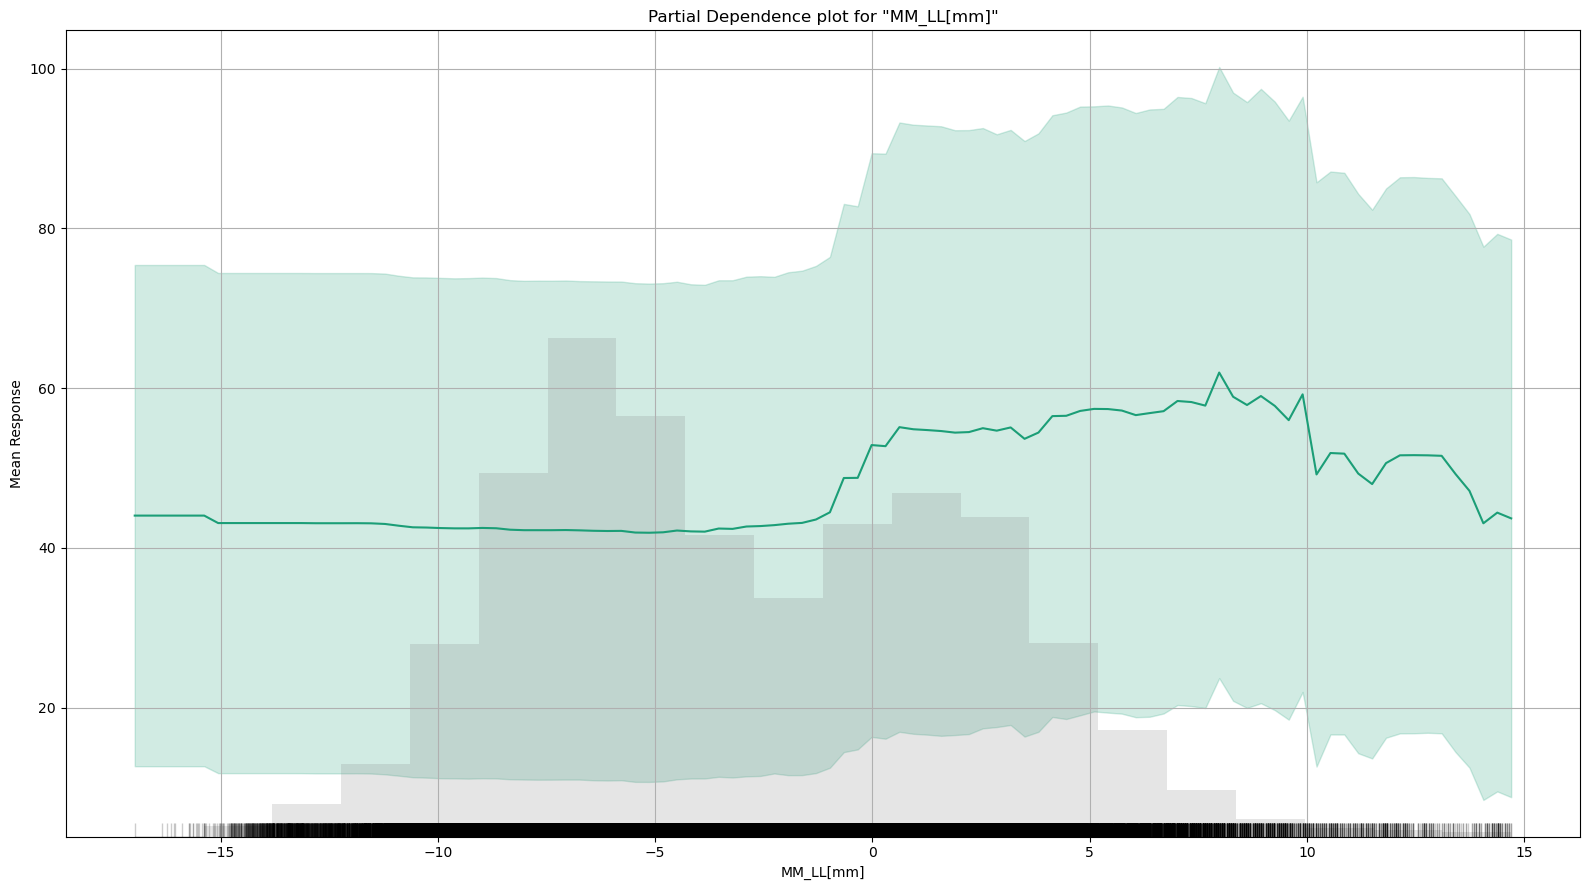

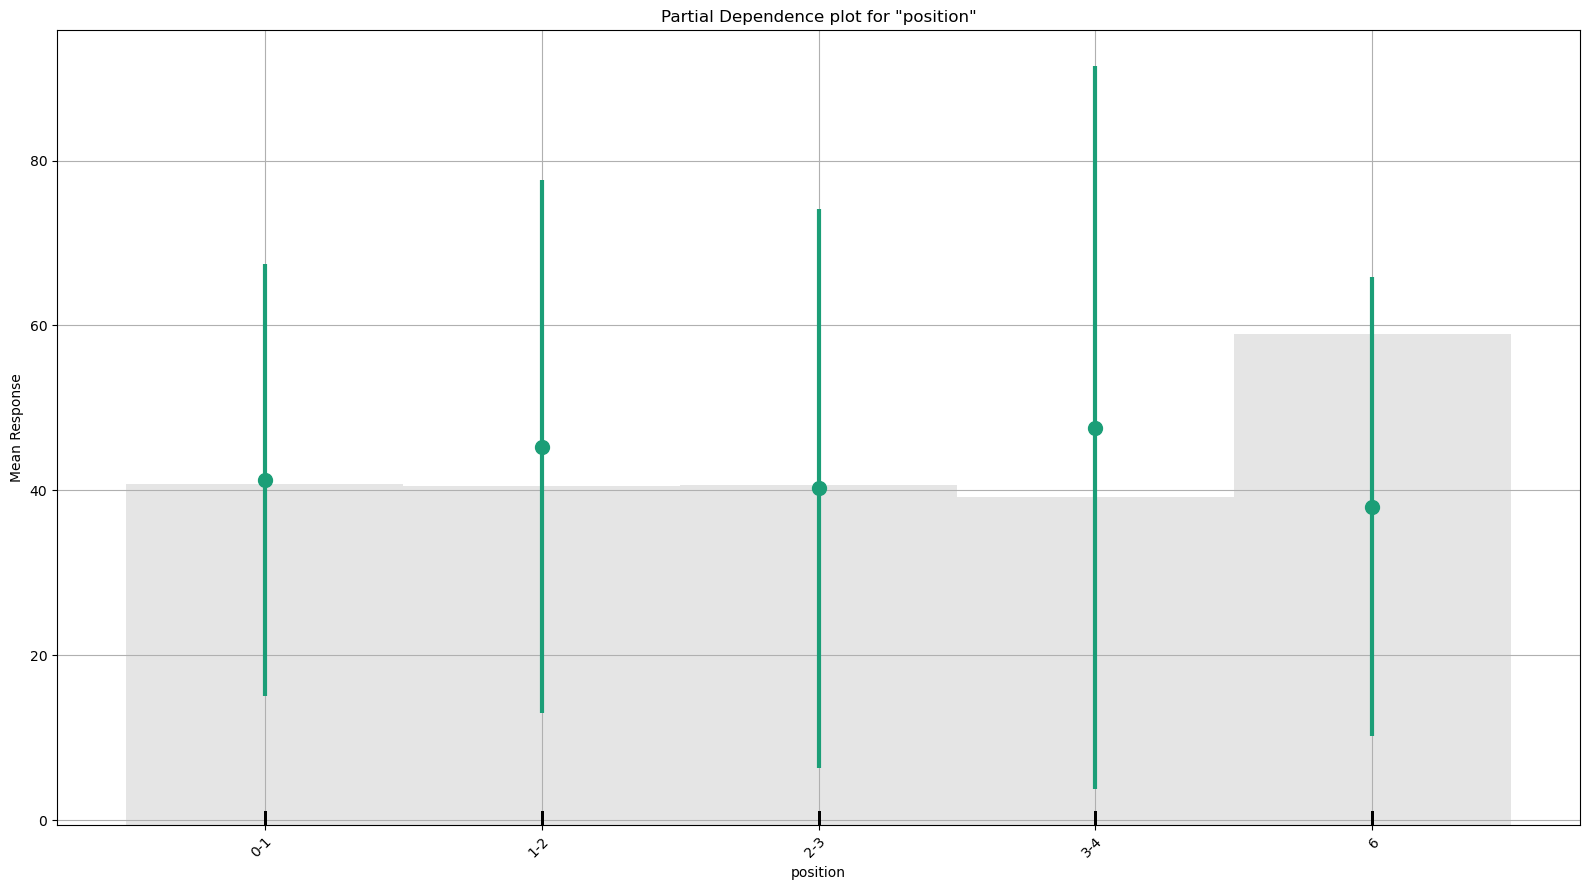

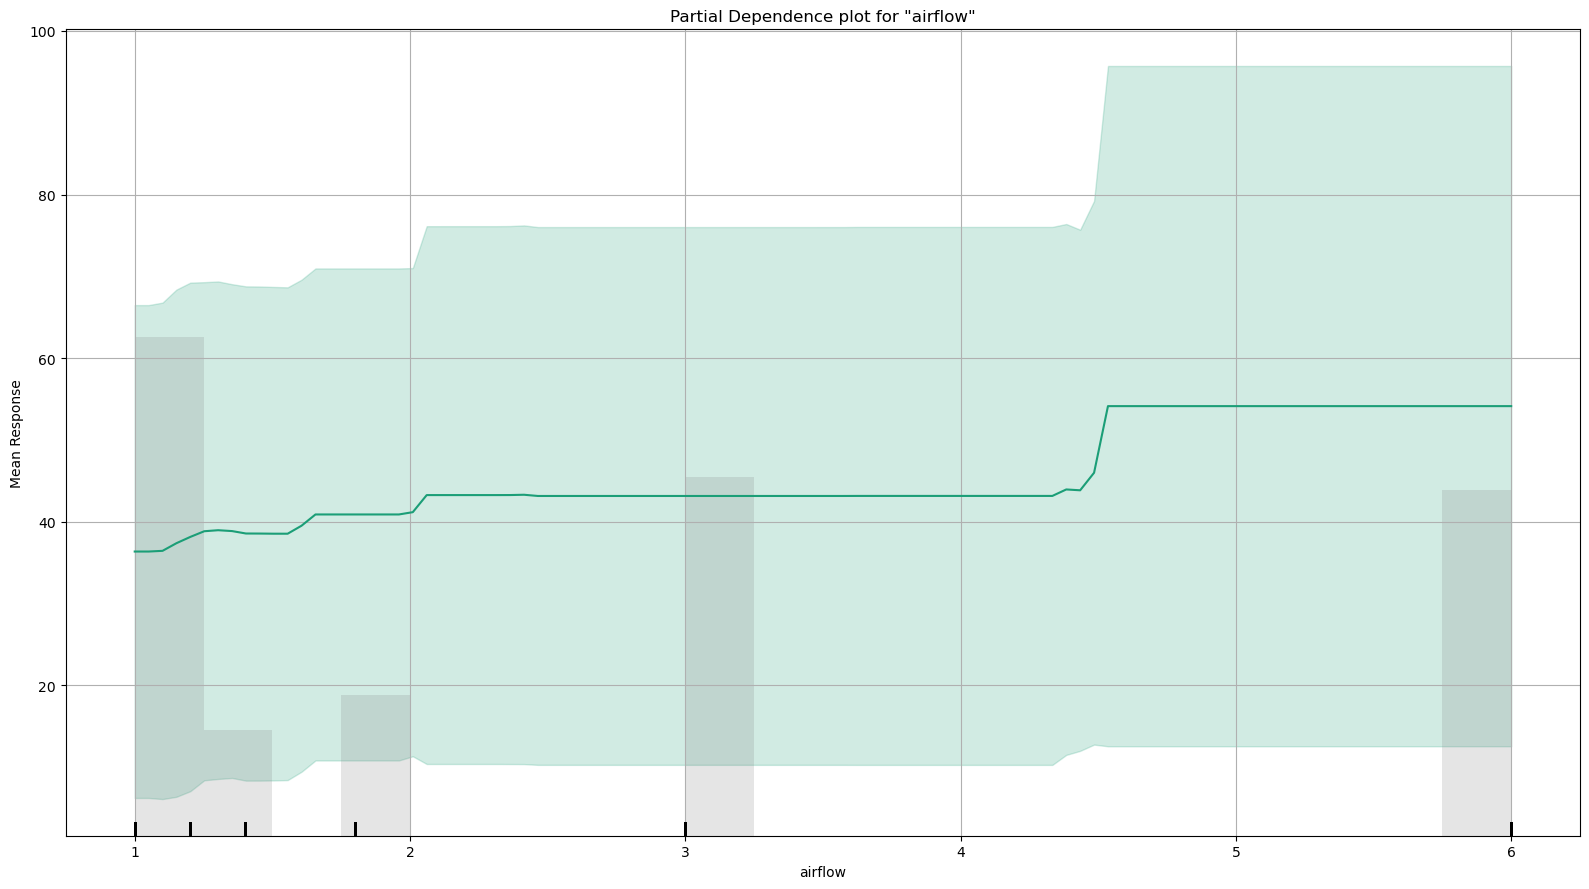

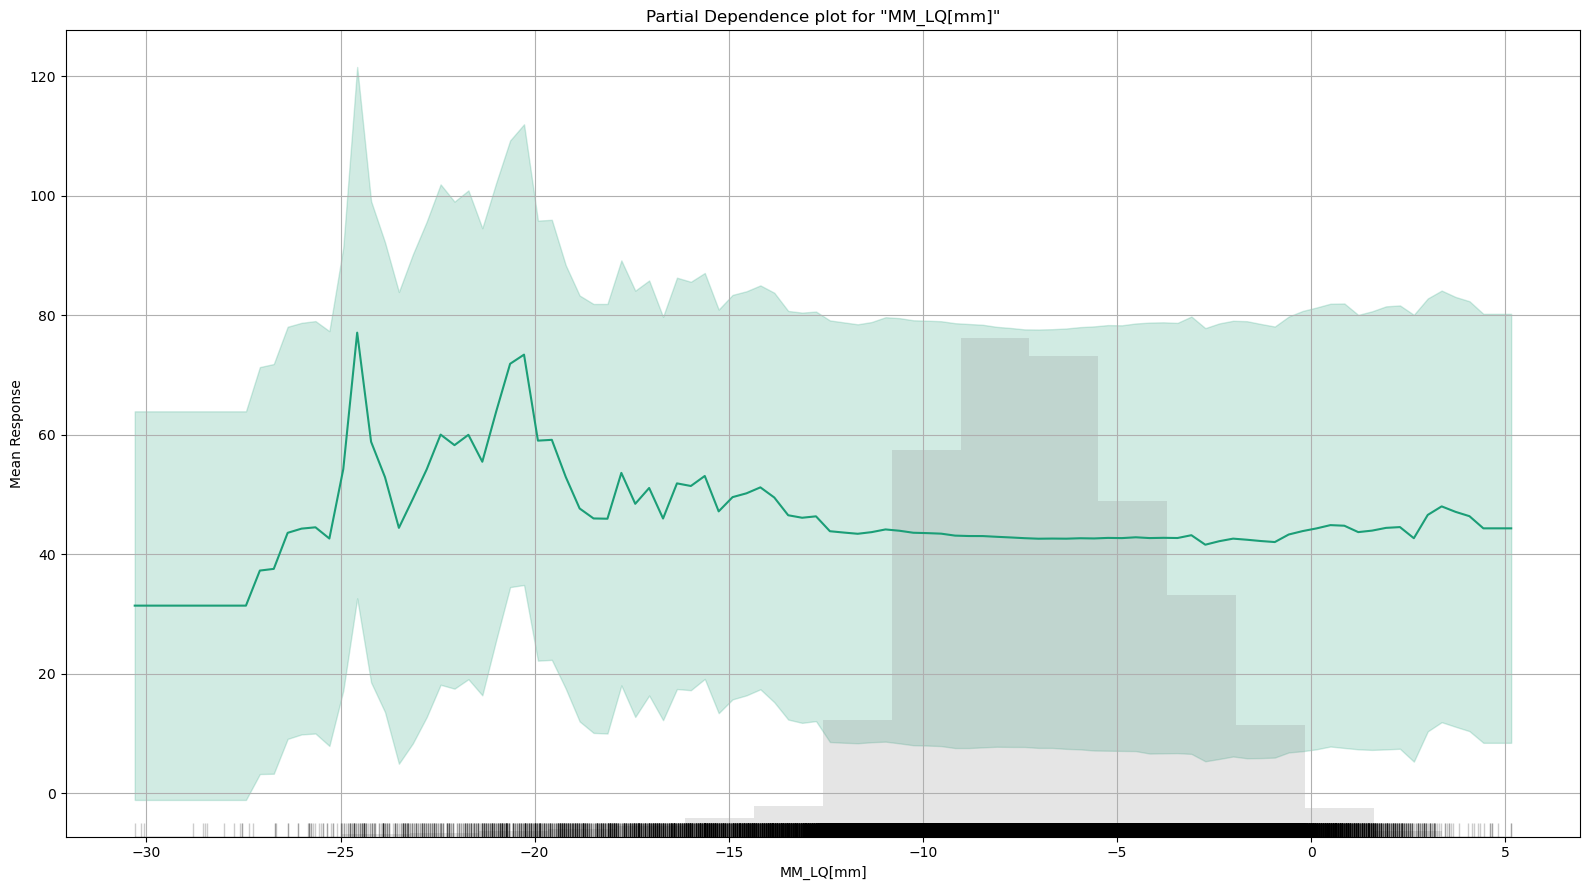

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

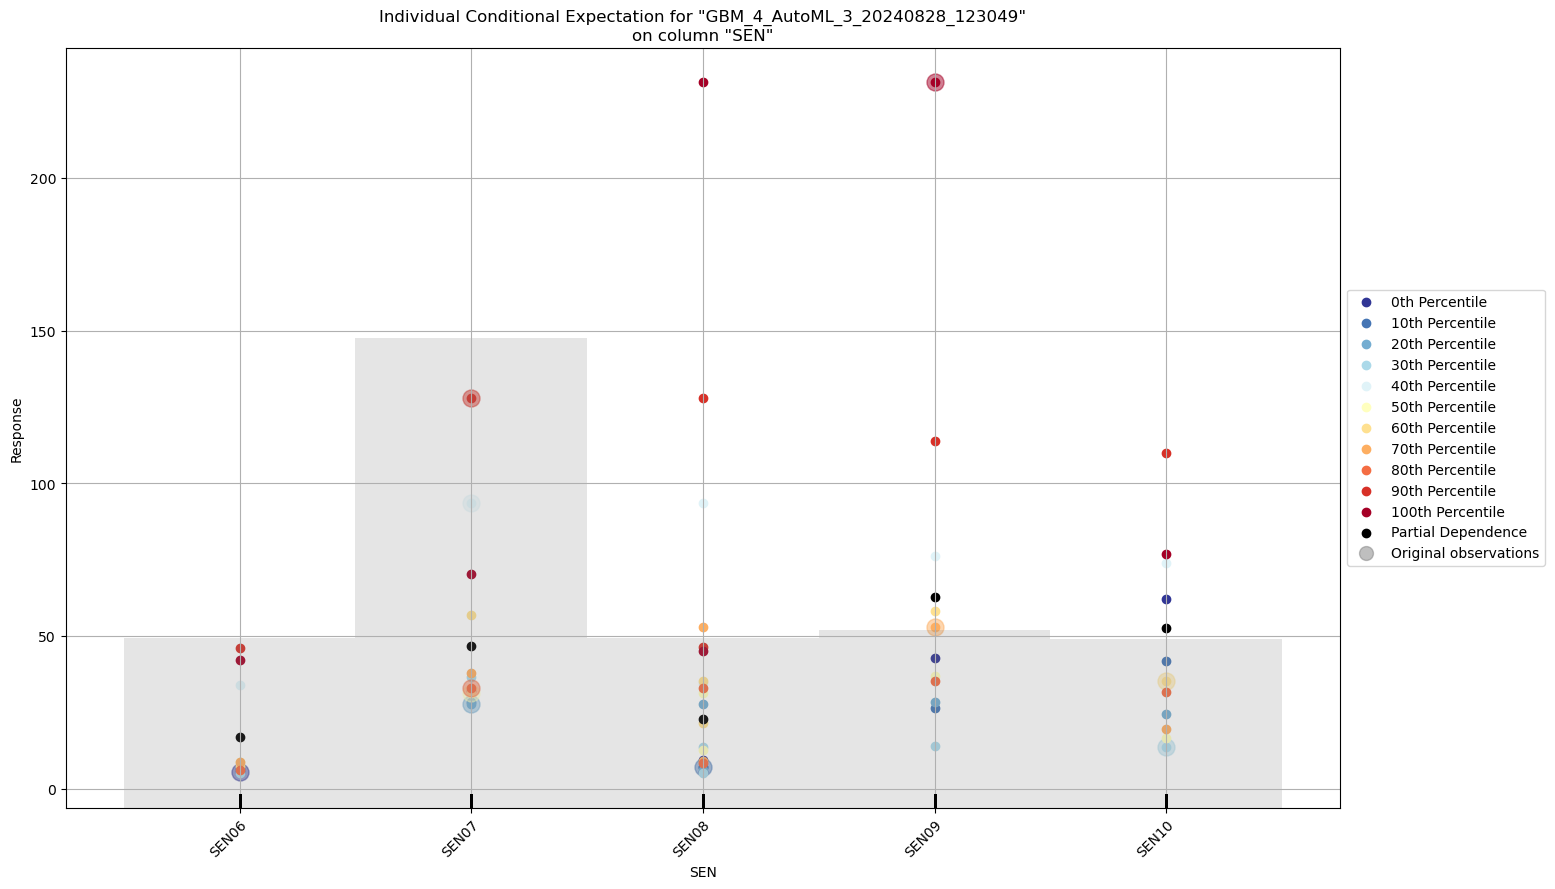

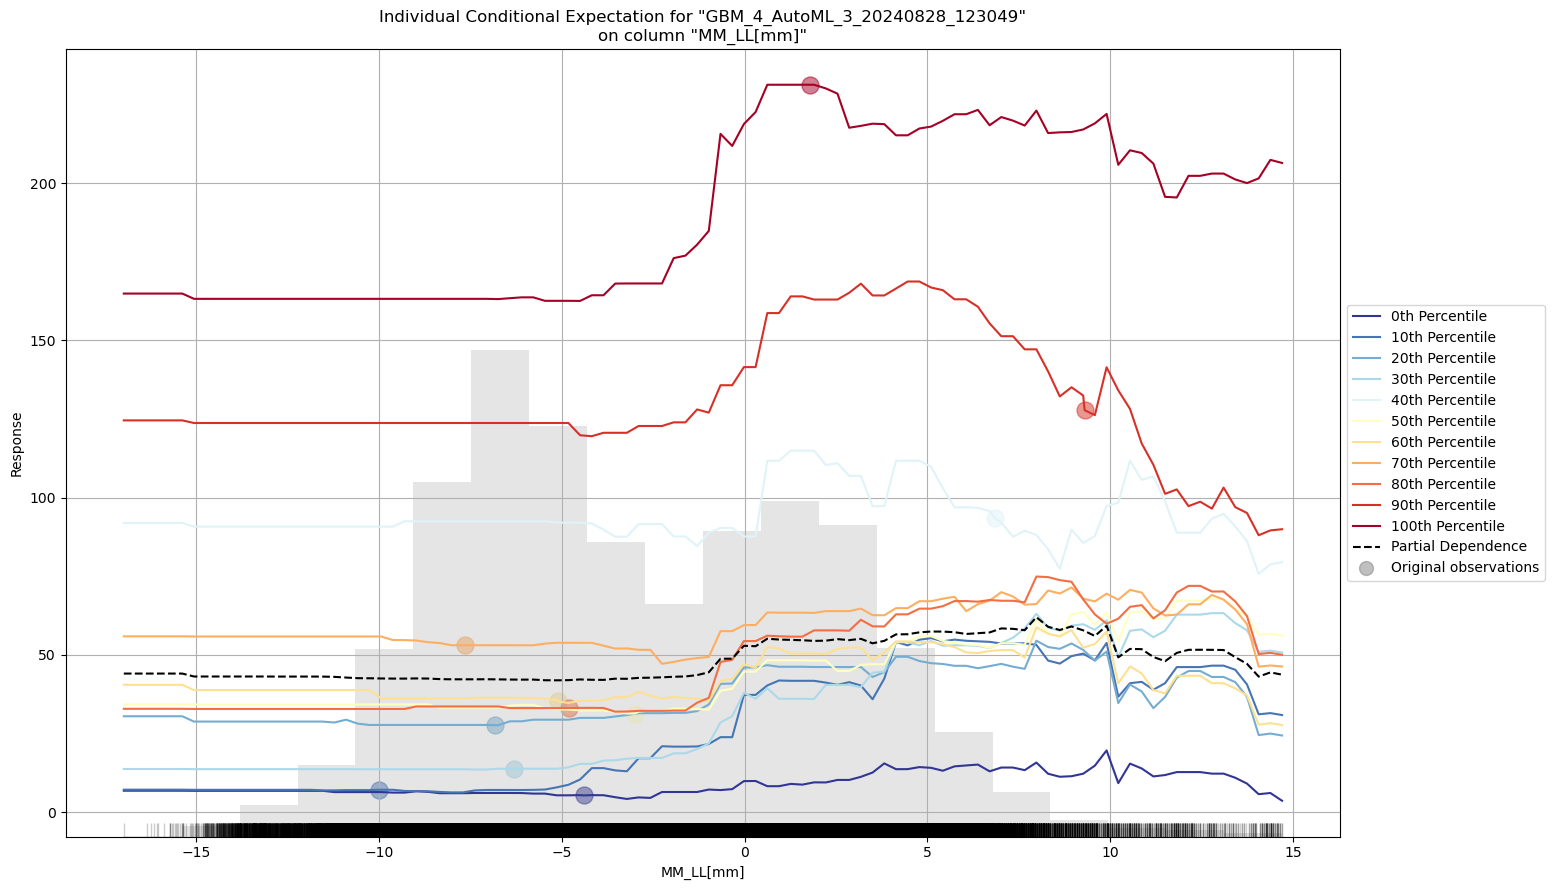

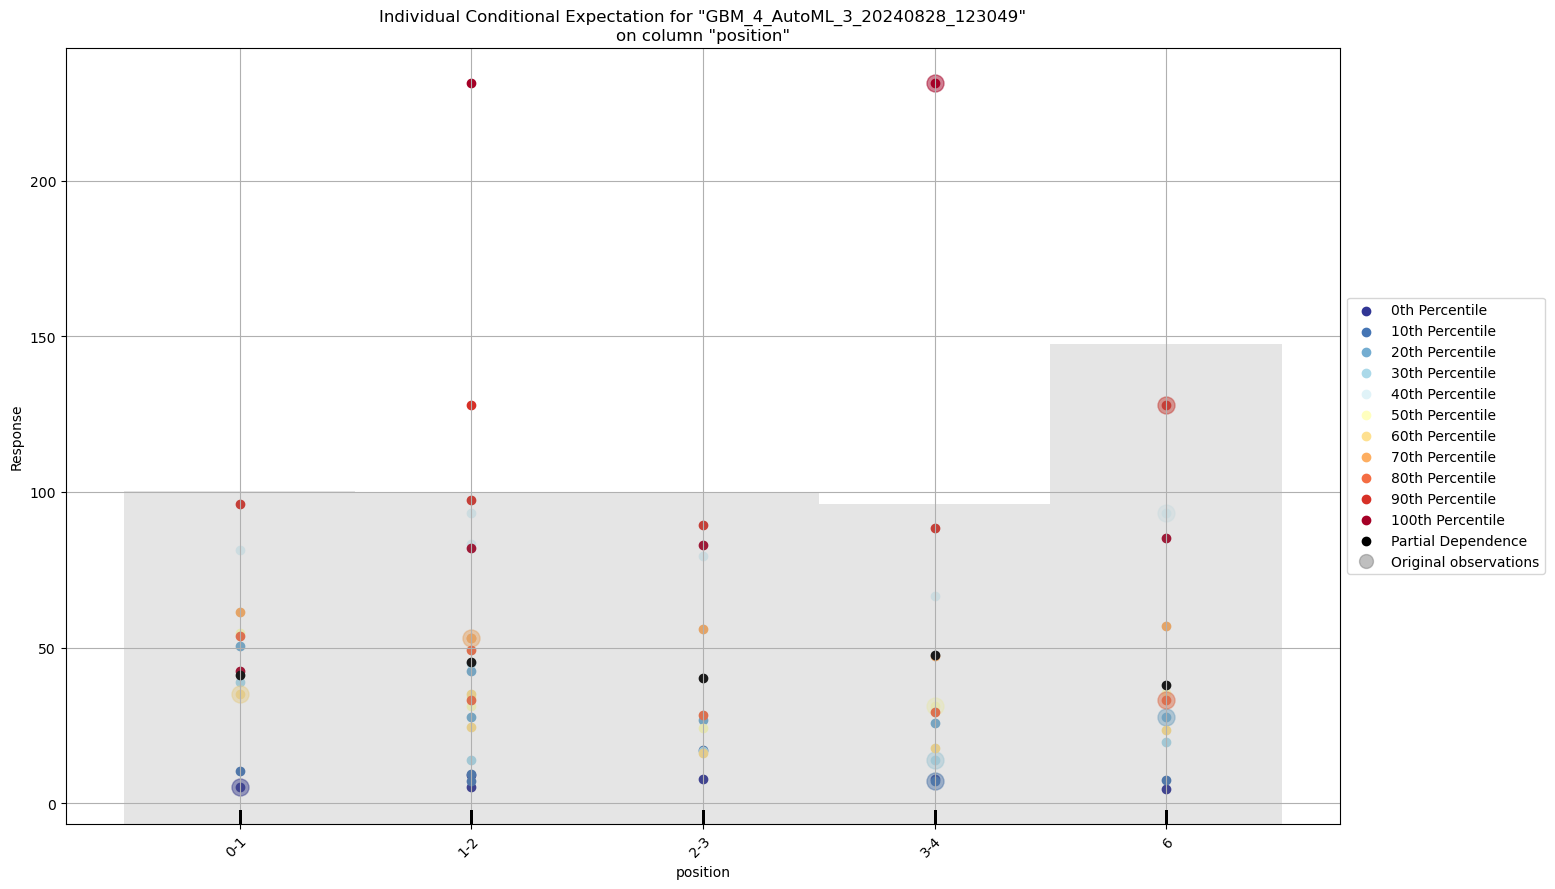

In [ ]:
gbm.explain(train_h2o)

In [15]:
# Get top model and see predictions on test set

best_model = aml.leader

predictions = best_model.predict(test_h2o)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [21]:
len(predictions)

19706

In [18]:
# Compare predictions with actual values

test_h2o['pred'] = predictions
test_h2o[['pred', y]]

pred,Count_EX1
21.7255,5.24345
54.858,33.7068
46.893,47.0772
17.8945,9.98445
62.5969,49.5332
51.795,49.6755
16.0046,15.8953
29.4174,19.6421
71.5691,94.8754
115.872,191.811


In [19]:
len(train_h2o)

78820

In [20]:
len(test_h2o)

19706